# Проект 2.
# Влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок


In [2]:
# Check first 5 observations
math = pd.read_csv('stud_math.csv')
math.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [3]:
# Overview variables of the data

math.info()

# Data set contains 395 observations, some variables have missing values but there are no many of them.
# There are 30 variables in total, 13 countable variables (12 of type "float" and 1 "int"), 17 variables of type "object".
# Almost in all variables there are missing values but they are not many.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

In [4]:
# Check the columns names

math.columns


Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [5]:
# Put all variables names into lower case for consistency, change 'studytime, granular' to 'studytime_granular'

math.columns = ['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime_granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score']
math.head(3)


,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0


### Functions

In [6]:
# Function to treat continious variables (strictly speaking, descrete variables with many values).
# It replaces NaN values for None,
# counts frequency for values and plots histogram.

def continious_var(column):
    math.loc[:, column] = math.loc[:, column].apply(lambda x: None if pd.isna(x) else None if x == 'NaN' else x)
    sns.distplot(math[column])
    plt.title('Histogram for ' + column)
    display(pd.DataFrame(math.loc[:, column].value_counts()))
    plt.show()
    

In [7]:
# Function to treat quantitative categorical variables.
# Function replaces NaN values with mode value,
# counts frequencies for each category and plots histogram.

def quant_categorical_var(column):
    print("Variable {}".format(column))
    print("Main statistics before transformation:\n{}".format(math[column].describe()))
    print("Missing values before transformation: {}".format(math[column].isnull().sum()))
    
    median = math[column].median()
    math.loc[:, column] = math.loc[:, column].apply(lambda x: median if pd.isna(x) else median if x == 'NaN' else x)
    print( )
    
    print("Main statistics after transformation:\n{}".format(math[column].describe()))
    print("Missing values after transformation: {}".format(math[column].isnull().sum()))
    
    sns.countplot(x = column, data = math)
    plt.title('Histogram for ' + column)
    display(pd.DataFrame(math.loc[:, column].value_counts()))
    plt.show()
    

In [8]:
# Function to treat qualitative categorical variables.
# Function replaces NaN values with None value,
# counts frequencies for each category and plots histogram.

def qual_categorical_var(column):
    math.loc[:, column] = math.loc[:, column].apply(lambda x: None if pd.isna(x) else None if x == 'NaN' else x)
    sns.countplot(x = column, data = math)
    plt.title('Histogram for ' + column)
    display(pd.DataFrame(math.loc[:, column].value_counts()))
    plt.show()
    

In [9]:
# Function for binary variables.
# It replaces values "yes" or "no" with "1" and "0" respectively

def transform_binary(column):
    math.loc[:, column] = math.loc[:, column].apply(lambda x: None if x == "None" else 1 if x == 'yes' else 0)
    display(pd.DataFrame(math.loc[:, column].value_counts()))
    

In [10]:
# Same function as in given example in the course to plot boxplot for categorical variables

def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x = column, y = 'score', 
                data = math.loc[math.loc[:, column].isin(math.loc[:, column].value_counts().index[:10])],
               ax = ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
    

In [11]:
# Same function as in given example in the course to check significant difference between categories

def get_stat_dif(column):
    cols = math.loc[:, column].value_counts()
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(math.loc[math.loc[:, column] == comb[0], 'score'], 
                        math.loc[math.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
        else:
            print('Не найдены статистически значимые различия для колонки', column)
            
            break
            

.

## Quantitative variables

There are 13 quantitative variables in the dataset, they are all discrete.
Variables: "age", "medu", "fedu", "traveltime", "studytime", "failures", "studytime_granular", "famrel", "freetime", "goout", "health", "absences", "score".

### "Continious" variables
Although variables "absences" and "score" are strictly speaking discrete, they can be treated also as continious ones as they have many categories included.

####  "Absences" variable

In [12]:
# Absences variables

# There are missing values, check where they are
math[math["absences"].isna()]["absences"]


24    NaN
101   NaN
120   NaN
129   NaN
150   NaN
172   NaN
215   NaN
227   NaN
254   NaN
265   NaN
270   NaN
352   NaN
Name: absences, dtype: float64

In [13]:
# check main statictical info of the variable
math["absences"].describe()

# It seems that there are outliers as max value is very different from 3d quartile value


count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

In [14]:
# Fill in missing values with median value

math["absences"].fillna(value = 4.0, inplace = True)
math["absences"].describe()

# Sigma and mean have changed slighlty but not very much


count    395.000000
mean       7.179747
std       23.111967
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

In [15]:
# There are no more missing values in the variable

math.loc[:, ["absences"]].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
absences    395 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


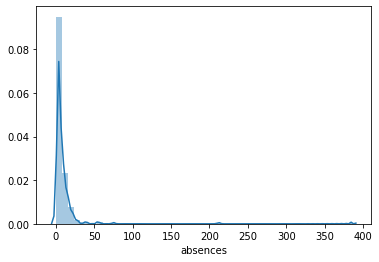

In [16]:
# Check the distribution visually with histogram

sns.distplot(math["absences"])

# Indeed, there are some outliers


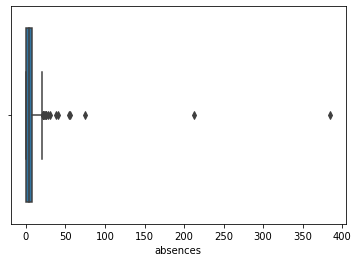

In [17]:
# Check the distribution visually with boxplot

sns.boxplot(math["absences"])

# Again we can see outliers


In [18]:
# Check outliers values 

math.absences.sort_values(ascending = False).head(15)


222    385.0
390    212.0
276     75.0
183     56.0
74      54.0
315     40.0
307     38.0
280     30.0
205     28.0
103     26.0
40      25.0
198     24.0
320     23.0
313     22.0
216     22.0
Name: absences, dtype: float64

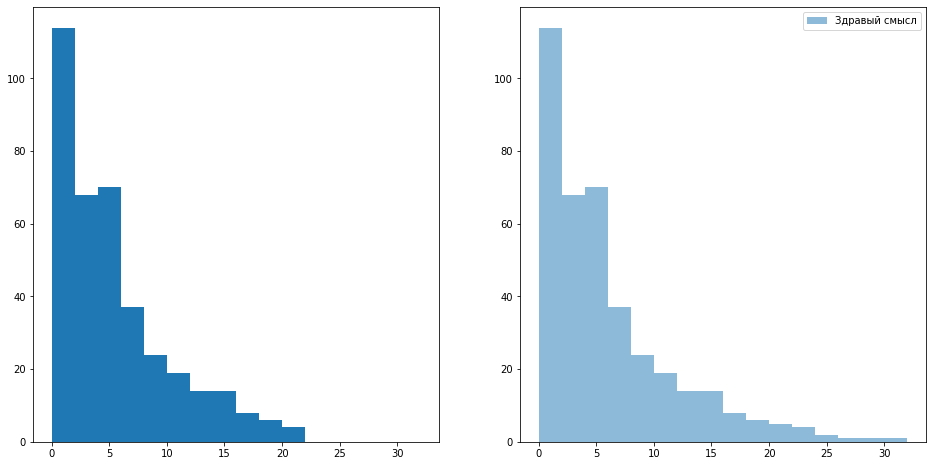

In [19]:
# Treat outliers by means of interquartile range method and "common sence" method

abs25 = math.absences.quantile(0.25) #first quartile
abs75 = math.absences.quantile(0.75) #third quartile
IQR = abs75 - abs25                  #interquartile range

fig, axes = plt.subplots(1, 2, figsize=(16,8)) # creat plot area

# filter values within +/- 1.5*IQR from first and third quartiles
absences_hist = math.absences.loc[math.absences.between(abs25 - 1.5*IQR, abs75 + 1.5*IQR)]

# plot histograms for both cases
axes[0].hist(absences_hist, bins = 16, range = (0, 32), label = 'IQR')
axes[1].hist(math.absences.loc[math.absences <= 30], alpha = 0.5, bins = 16, range = (0, 32), label = 'Здравый смысл')
# filter values which are less than 30 absences

plt.legend()

In [20]:
# Check statistical details of variable distribution filtered using 1.5*IQR method

math.absences.loc[math.absences.between(abs25 - 1.5*IQR, abs75 + 1.5*IQR)].describe()


count    378.000000
mean       4.584656
std        4.886996
min        0.000000
25%        0.000000
50%        4.000000
75%        6.750000
max       20.000000
Name: absences, dtype: float64

In [21]:
# Check statistical details of variable distirbution filtered using "common sense" (i.e. values less than 30 absences)

math.absences.loc[math.absences <= 30].describe()


count    388.000000
mean       5.092784
std        5.766485
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       30.000000
Name: absences, dtype: float64

There is slight change in the mean and standart deviation values, distribution keeps to be mostly the same.

In [22]:
# Keep the filtering based on common sense

math = math.loc[math.absences <= 30]
math.info()

#388 entries are left

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 394
Data columns (total 30 columns):
school                388 non-null object
sex                   388 non-null object
age                   388 non-null int64
address               371 non-null object
famsize               361 non-null object
pstatus               345 non-null object
medu                  385 non-null float64
fedu                  364 non-null float64
mjob                  369 non-null object
fjob                  352 non-null object
reason                371 non-null object
guardian              358 non-null object
traveltime            360 non-null float64
studytime             381 non-null float64
failures              366 non-null float64
schoolsup             379 non-null object
famsup                351 non-null object
paid                  348 non-null object
activities            374 non-null object
nursery               372 non-null object
studytime_granular    381 non-null float64
higher  

#### "Score" variable

In [23]:
# Check missing values

math[math['score'].isnull()]["score"]


201   NaN
244   NaN
270   NaN
283   NaN
312   NaN
350   NaN
Name: score, dtype: float64

In [24]:
# Check statistical parameters

math['score'].describe()


count    382.000000
mean      52.264398
std       23.043739
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

In [25]:
# Replace missing values with the median
# Check for missing values 

math['score'].fillna(value = 55.0, inplace = True)
math[math['score'].isnull()]["score"]

# No more missing in the variable


Series([], Name: score, dtype: float64)

In [26]:
# Chaecl statistics for variable with replacsed missing values

math['score'].describe()


count    388.000000
mean      52.306701
std       22.866905
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 394
Data columns (total 1 columns):
score    388 non-null float64
dtypes: float64(1)
memory usage: 6.1 KB


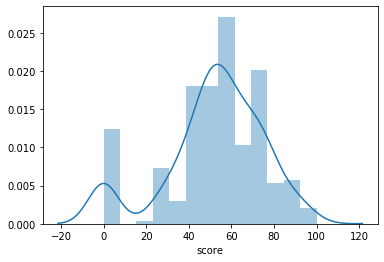

In [27]:
# Check info about variable, plot dsitribution

math.loc[:, ["score"]].info()
sns.distplot(math["score"])


In [28]:
# There are quite many values with 0 (zero score)
# Check exactly how many they are

math[math["score"] == 0]["score"].value_counts()

# 37 students got 0 (zero) score

0.0    37
Name: score, dtype: int64

Analysis shows that 37 students got 0 ("zero") score, which is about 10% fo total number of students. We can assume that these are students who didn't pass the test as well as students absent at the examination. However, it is worth to check with the data owner or with the field expert(s) if that percentage of 0 scores is something current that could have really taken place.

### Quantitative categorical variables

Check for number of categories and its distributions for each variable.

#### Variable 'age' and variables for parents education ('medu', 'fedu')

Variable age
Main statistics before transformation:
count    388.000000
mean      16.675258
std        1.262746
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64
Missing values before transformation: 0

Main statistics after transformation:
count    388.000000
mean      16.675258
std        1.262746
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64
Missing values after transformation: 0


,age
16,102
17,97
15,82
18,81
19,22
20,2
22,1
21,1


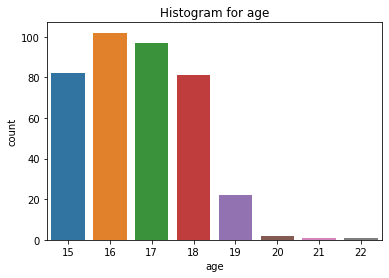

Variable medu
Main statistics before transformation:
count    385.000000
mean       2.750649
std        1.104044
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: medu, dtype: float64
Missing values before transformation: 3

Main statistics after transformation:
count    388.000000
mean       2.752577
std        1.099973
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: medu, dtype: float64
Missing values after transformation: 0


,medu
4.0,130
2.0,99
3.0,97
1.0,59
0.0,3


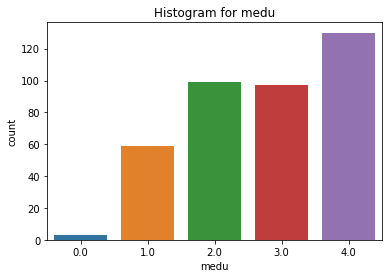

Variable fedu
Main statistics before transformation:
count    364.000000
mean       2.609890
std        2.248112
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: fedu, dtype: float64
Missing values before transformation: 24

Main statistics after transformation:
count    388.000000
mean       2.572165
std        2.182251
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: fedu, dtype: float64
Missing values after transformation: 0


,fedu
2.0,128
3.0,92
4.0,87
1.0,78
0.0,2
40.0,1


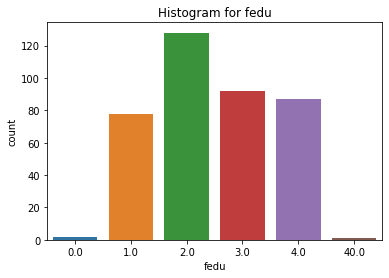

In [29]:
# Variables 'age', 'medu', 'fedu'

for col in ['age', 'medu', 'fedu']:
    quant_categorical_var(col)
     

About 93% students are between 15 and 18 years old. There are 4 students in total aged between 20 and 22 years old.

Mothers look to be more educated than fathers. There is one outlier value in father education data, value = 40

In [30]:
# check observation with value fedu=40

math[math.fedu == 40]


,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
11,GP,F,15,U,GT3,NaN,2.0,40.0,services,other,reputation,father,3.0,3.0,0.0,no,yes,no,yes,yes,-9.0,yes,yes,no,5.0,2.0,2.0,4.0,4.0,60.0


In [31]:
# filter data, keep values for "fedu" except "40"

math = math.loc[math.fedu != 40]


In [32]:
math.info()

# There are 387 observations left

<class 'pandas.core.frame.DataFrame'>
Int64Index: 387 entries, 0 to 394
Data columns (total 30 columns):
school                387 non-null object
sex                   387 non-null object
age                   387 non-null int64
address               370 non-null object
famsize               360 non-null object
pstatus               345 non-null object
medu                  387 non-null float64
fedu                  387 non-null float64
mjob                  368 non-null object
fjob                  351 non-null object
reason                370 non-null object
guardian              357 non-null object
traveltime            359 non-null float64
studytime             380 non-null float64
failures              365 non-null float64
schoolsup             378 non-null object
famsup                350 non-null object
paid                  347 non-null object
activities            373 non-null object
nursery               371 non-null object
studytime_granular    380 non-null float64
higher  

#### Variables 'guardian', 'traveltime', 'studytime', 'failures'

Variable traveltime
Main statistics before transformation:
count    359.000000
mean       1.437326
std        0.693827
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64
Missing values before transformation: 28

Main statistics after transformation:
count    387.000000
mean       1.405685
std        0.677751
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64
Missing values after transformation: 0


,traveltime
1.0,265
2.0,94
3.0,21
4.0,7


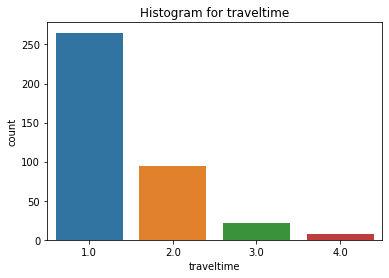

Variable studytime
Main statistics before transformation:
count    380.000000
mean       2.036842
std        0.846355
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64
Missing values before transformation: 7

Main statistics after transformation:
count    387.000000
mean       2.036176
std        0.838660
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64
Missing values after transformation: 0


,studytime
2.0,196
1.0,102
3.0,62
4.0,27


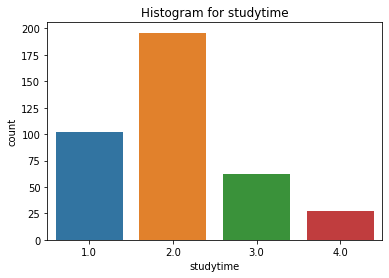

Variable failures
Main statistics before transformation:
count    365.000000
mean       0.334247
std        0.743510
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64
Missing values before transformation: 22

Main statistics after transformation:
count    387.000000
mean       0.315245
std        0.726158
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64
Missing values after transformation: 0


,failures
0.0,310
1.0,47
2.0,15
3.0,15


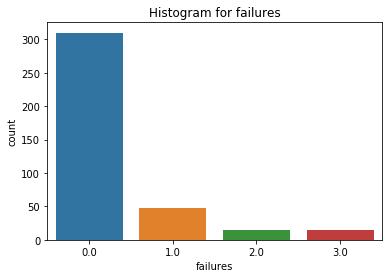

In [33]:
# Variables 'traveltime', 'studytime', 'failures'

for col in [ 'traveltime', 'studytime',  'failures']:
    quant_categorical_var(col)

After replacing missing values by median, main statistics stays almost the same for all variables.
About 68% of students live within 15 min distance from school, 26% - wihitn 15-30 min from school.
About 51% spend 2 - 5 hours per week for studies out of school, about 26% - less than 2 hours per week.
80% of students have 0 (zero) failures, 13% - one failure.


#### Variables 'studytime_granular', 'famrel', 'freetime'

Variable studytime_granular
Main statistics before transformation:
count    380.000000
mean      -6.110526
std        2.539066
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime_granular, dtype: float64
Missing values before transformation: 7

Main statistics after transformation:
count    387.000000
mean      -6.108527
std        2.515981
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime_granular, dtype: float64
Missing values after transformation: 0


,studytime_granular
-6.0,196
-3.0,102
-9.0,62
-12.0,27


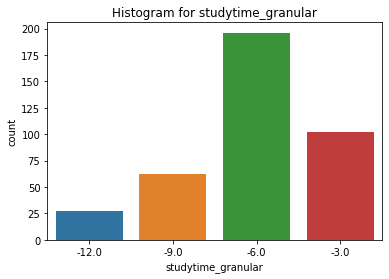

Variable famrel
Main statistics before transformation:
count    361.000000
mean       3.933518
std        0.925570
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64
Missing values before transformation: 26

Main statistics after transformation:
count    387.000000
mean       3.937984
std        0.894009
min       -1.000000
25%        4.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: famrel, dtype: float64
Missing values after transformation: 0


,famrel
4.0,205
5.0,96
3.0,62
2.0,16
1.0,7
-1.0,1


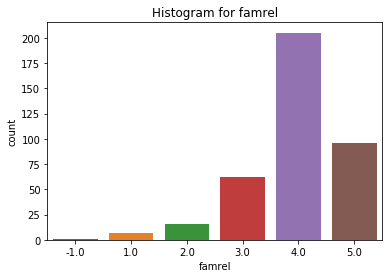

Variable freetime
Main statistics before transformation:
count    377.000000
mean       3.244032
std        0.983304
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64
Missing values before transformation: 10

Main statistics after transformation:
count    387.000000
mean       3.237726
std        0.971257
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64
Missing values after transformation: 0


,freetime
3.0,160
4.0,112
2.0,62
5.0,37
1.0,16


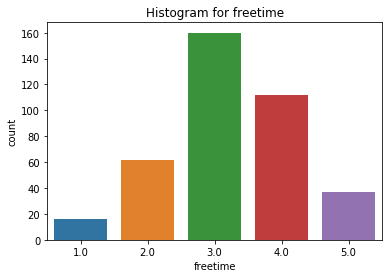

In [34]:
# Variables 'studytime_granular', 'famrel', 'freetime'

for col in ['studytime_granular','famrel', 'freetime']:
    quant_categorical_var(col)

There is an outlier value in famrel attribute

In [35]:
# fix outlier in famrel attribute

math = math.loc[math.famrel > 0]

After replacing missing values by median, main statistics stays almost the same for all variables. Variable "studytime granular" is not mentionned in dataset description, therefore it's difficult to interpret its values. However, its categories have same values as in "studytime" variable, apparently they are related. Largest share of observations in the variable, 51%, is related to category (-6).
Around 53% of students' families have good relationships (4.0) and 25% - very good (5.0).
Amount of freetime for 41% is characterised at the level of 3.0 points and for 29% of students at the level of 4.0 points on 1.0 - 5.0 scale.

.

#### Variables "проведение времени с друзьями" ('goout'), "здоровье" ('health')

Variable goout
Main statistics before transformation:
count    378.000000
mean       3.121693
std        1.112268
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64
Missing values before transformation: 8

Main statistics after transformation:
count    386.000000
mean       3.119171
std        1.100789
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64
Missing values after transformation: 0


,goout
3.0,133
2.0,98
4.0,82
5.0,52
1.0,21


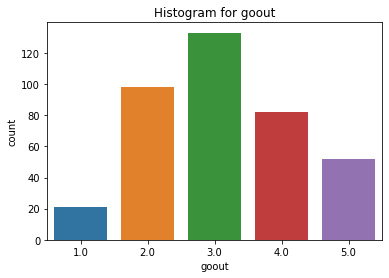

Variable health
Main statistics before transformation:
count    371.000000
mean       3.525606
std        1.399331
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64
Missing values before transformation: 15

Main statistics after transformation:
count    386.000000
mean       3.544041
std        1.374868
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64
Missing values after transformation: 0


,health
5.0,135
3.0,87
4.0,75
1.0,46
2.0,43


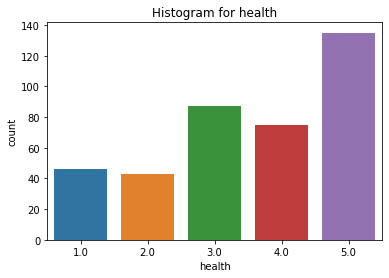

In [36]:
# Variables 'goout', 'health'

for col in ['goout', 'health']:
    quant_categorical_var(col)

Distribution of "goout" variable is similar to freetime, close to normal bell shape. Most observations are the the level 3.0 (34%) on 1.0 - 5.0 scale.
About 34% of students have very good health, 19% - good, 22% - medium. Almost 23% stated bad and very bad health.

.

### Qualitative Categorical variables

#### Variables 'school', 'sex'

,school
GP,341
MS,45


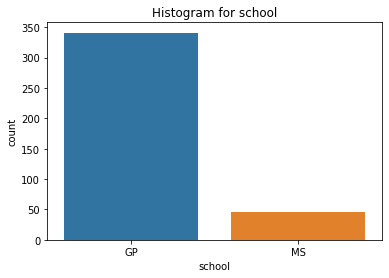

,sex
F,201
M,185


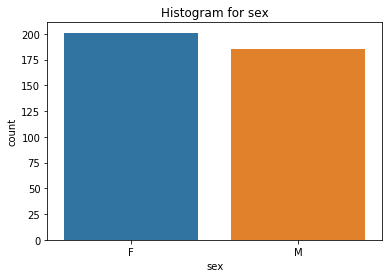

In [37]:
# Variables 'school', 'sex'

for col in ['school', 'sex']:
    qual_categorical_var(col) #using function set above for treating categorical nominative variables
    

Variables "school" and "sex" have both two categories. Majority of students go to GP school (at about 88%), there are 52% girls and 48% boys. 

.

#### Variables 'address', 'famsize', 'pstatus'

,address
U,288
R,81


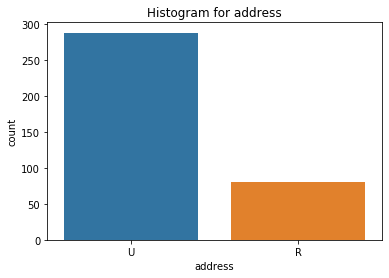

,famsize
GT3,254
LE3,105


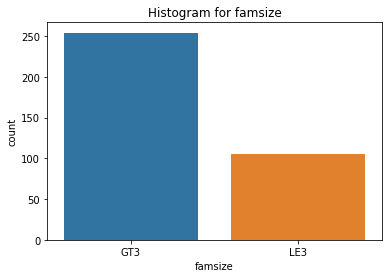

,pstatus
T,311
A,34


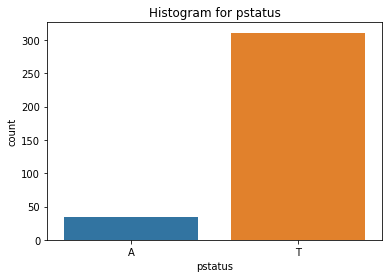

In [38]:
# Variables 'address', 'famsize', 'pstatus'

for col in ['address', 'famsize', 'pstatus']:
    qual_categorical_var(col)

"Address", "Family size" and "Parent status" variables have 2 categories each.  About 78% of students live in urban area, 71% live in families with more than 3 members. 90% students live with both parents.

.

#### Variables for parents job ('mjob', 'fjob') , reason of choosing the school ( 'reason') and guardian

,mjob
other,129
services,94
at_home,58
teacher,54
health,32


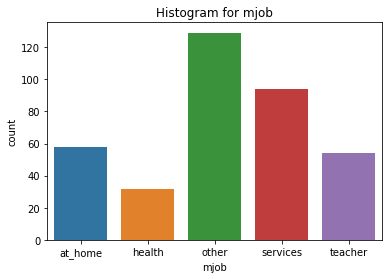

,fjob
other,194
services,97
teacher,28
at_home,16
health,15


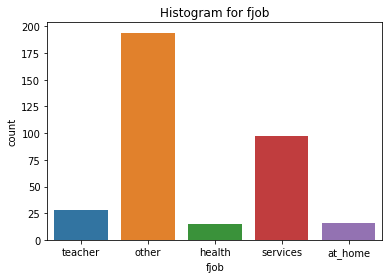

,reason
course,136
home,101
reputation,99
other,33


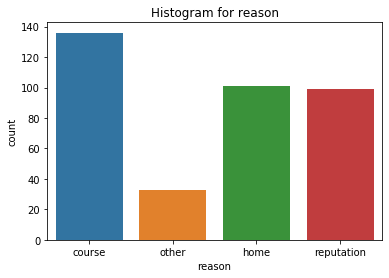

,guardian
mother,245
father,85
other,26


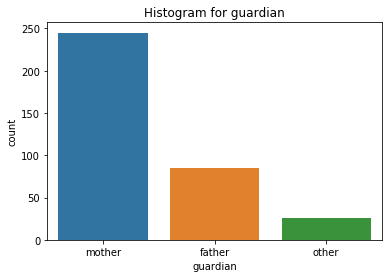

In [39]:
# Variables 'mjob', 'fjob', 'reason', 'guardian'

for col in [ 'mjob', 'fjob', 'reason', 'guardian']:
    qual_categorical_var(col)

There are 4 categories in parents job types. For both parents most popular categories are other and services. Mothers work more as theacher in health and in services than fathers. They are also more "at_home" than farthers.

Main reason for school selection is "course" (образовательная программа), then home (близость к дому) and school reputation.

As to "guardian", about 70% of students have mothers as guardian.


.

#### Variables for school support ('schoolsup') and family support ('famsup')

,schoolsup
no,328
yes,49


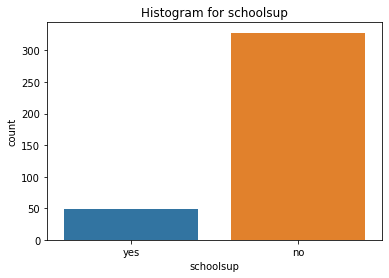

,famsup
yes,213
no,136


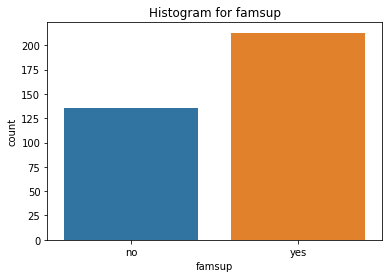

In [40]:
#  Variables 'schoolsup' and 'famsup'

for col in [ 'schoolsup', 'famsup']:
    qual_categorical_var(col)

About 87% of students dont have additional school support, however, about 61% have support in the family.

.

#### Variables  'paid', 'activities', 'nursery'

,paid
no,195
yes,151


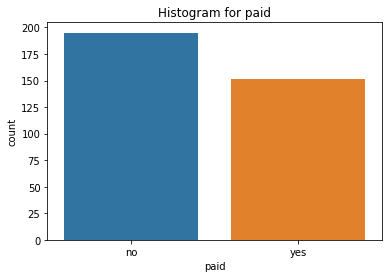

,activities
yes,192
no,180


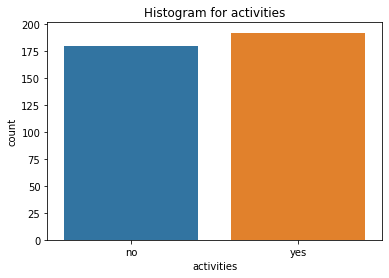

,nursery
yes,293
no,77


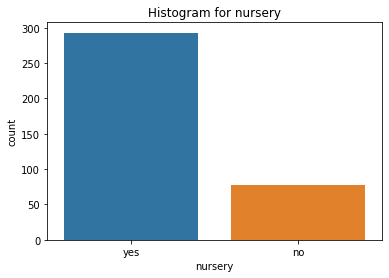

In [41]:
# Variables 'paid', 'activities', 'nursery'

for col in ['paid', 'activities', 'nursery']:
    qual_categorical_var(col)

About 44% of students have paid math lessons, 52% have out os scholl activities, 79% were at nursery.

.

#### Variables 'higher', 'internet', 'romantic'

,higher
yes,348
no,18


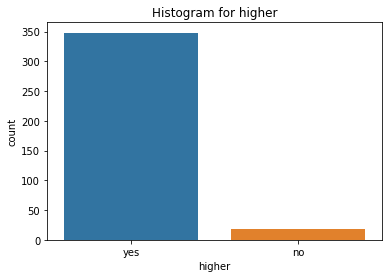

,internet
yes,297
no,55


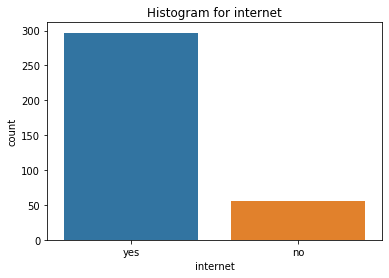

,romantic
no,235
yes,120


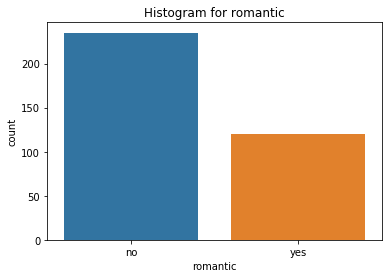

In [42]:
# Variables  'higher', 'internet', 'romantic'
    
for col in ['higher', 'internet', 'romantic']:
    qual_categorical_var(col)
    

Around 95% of students want th get higher education
84% have internet access at home 
66% are not in romantice relationships.

.

In [43]:
math.head(25)

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,None,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,None,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,None,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,None,no,yes,-6.0,yes,yes,None,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,None,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,None,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,4.0,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,None,None,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


## Correlations analysis

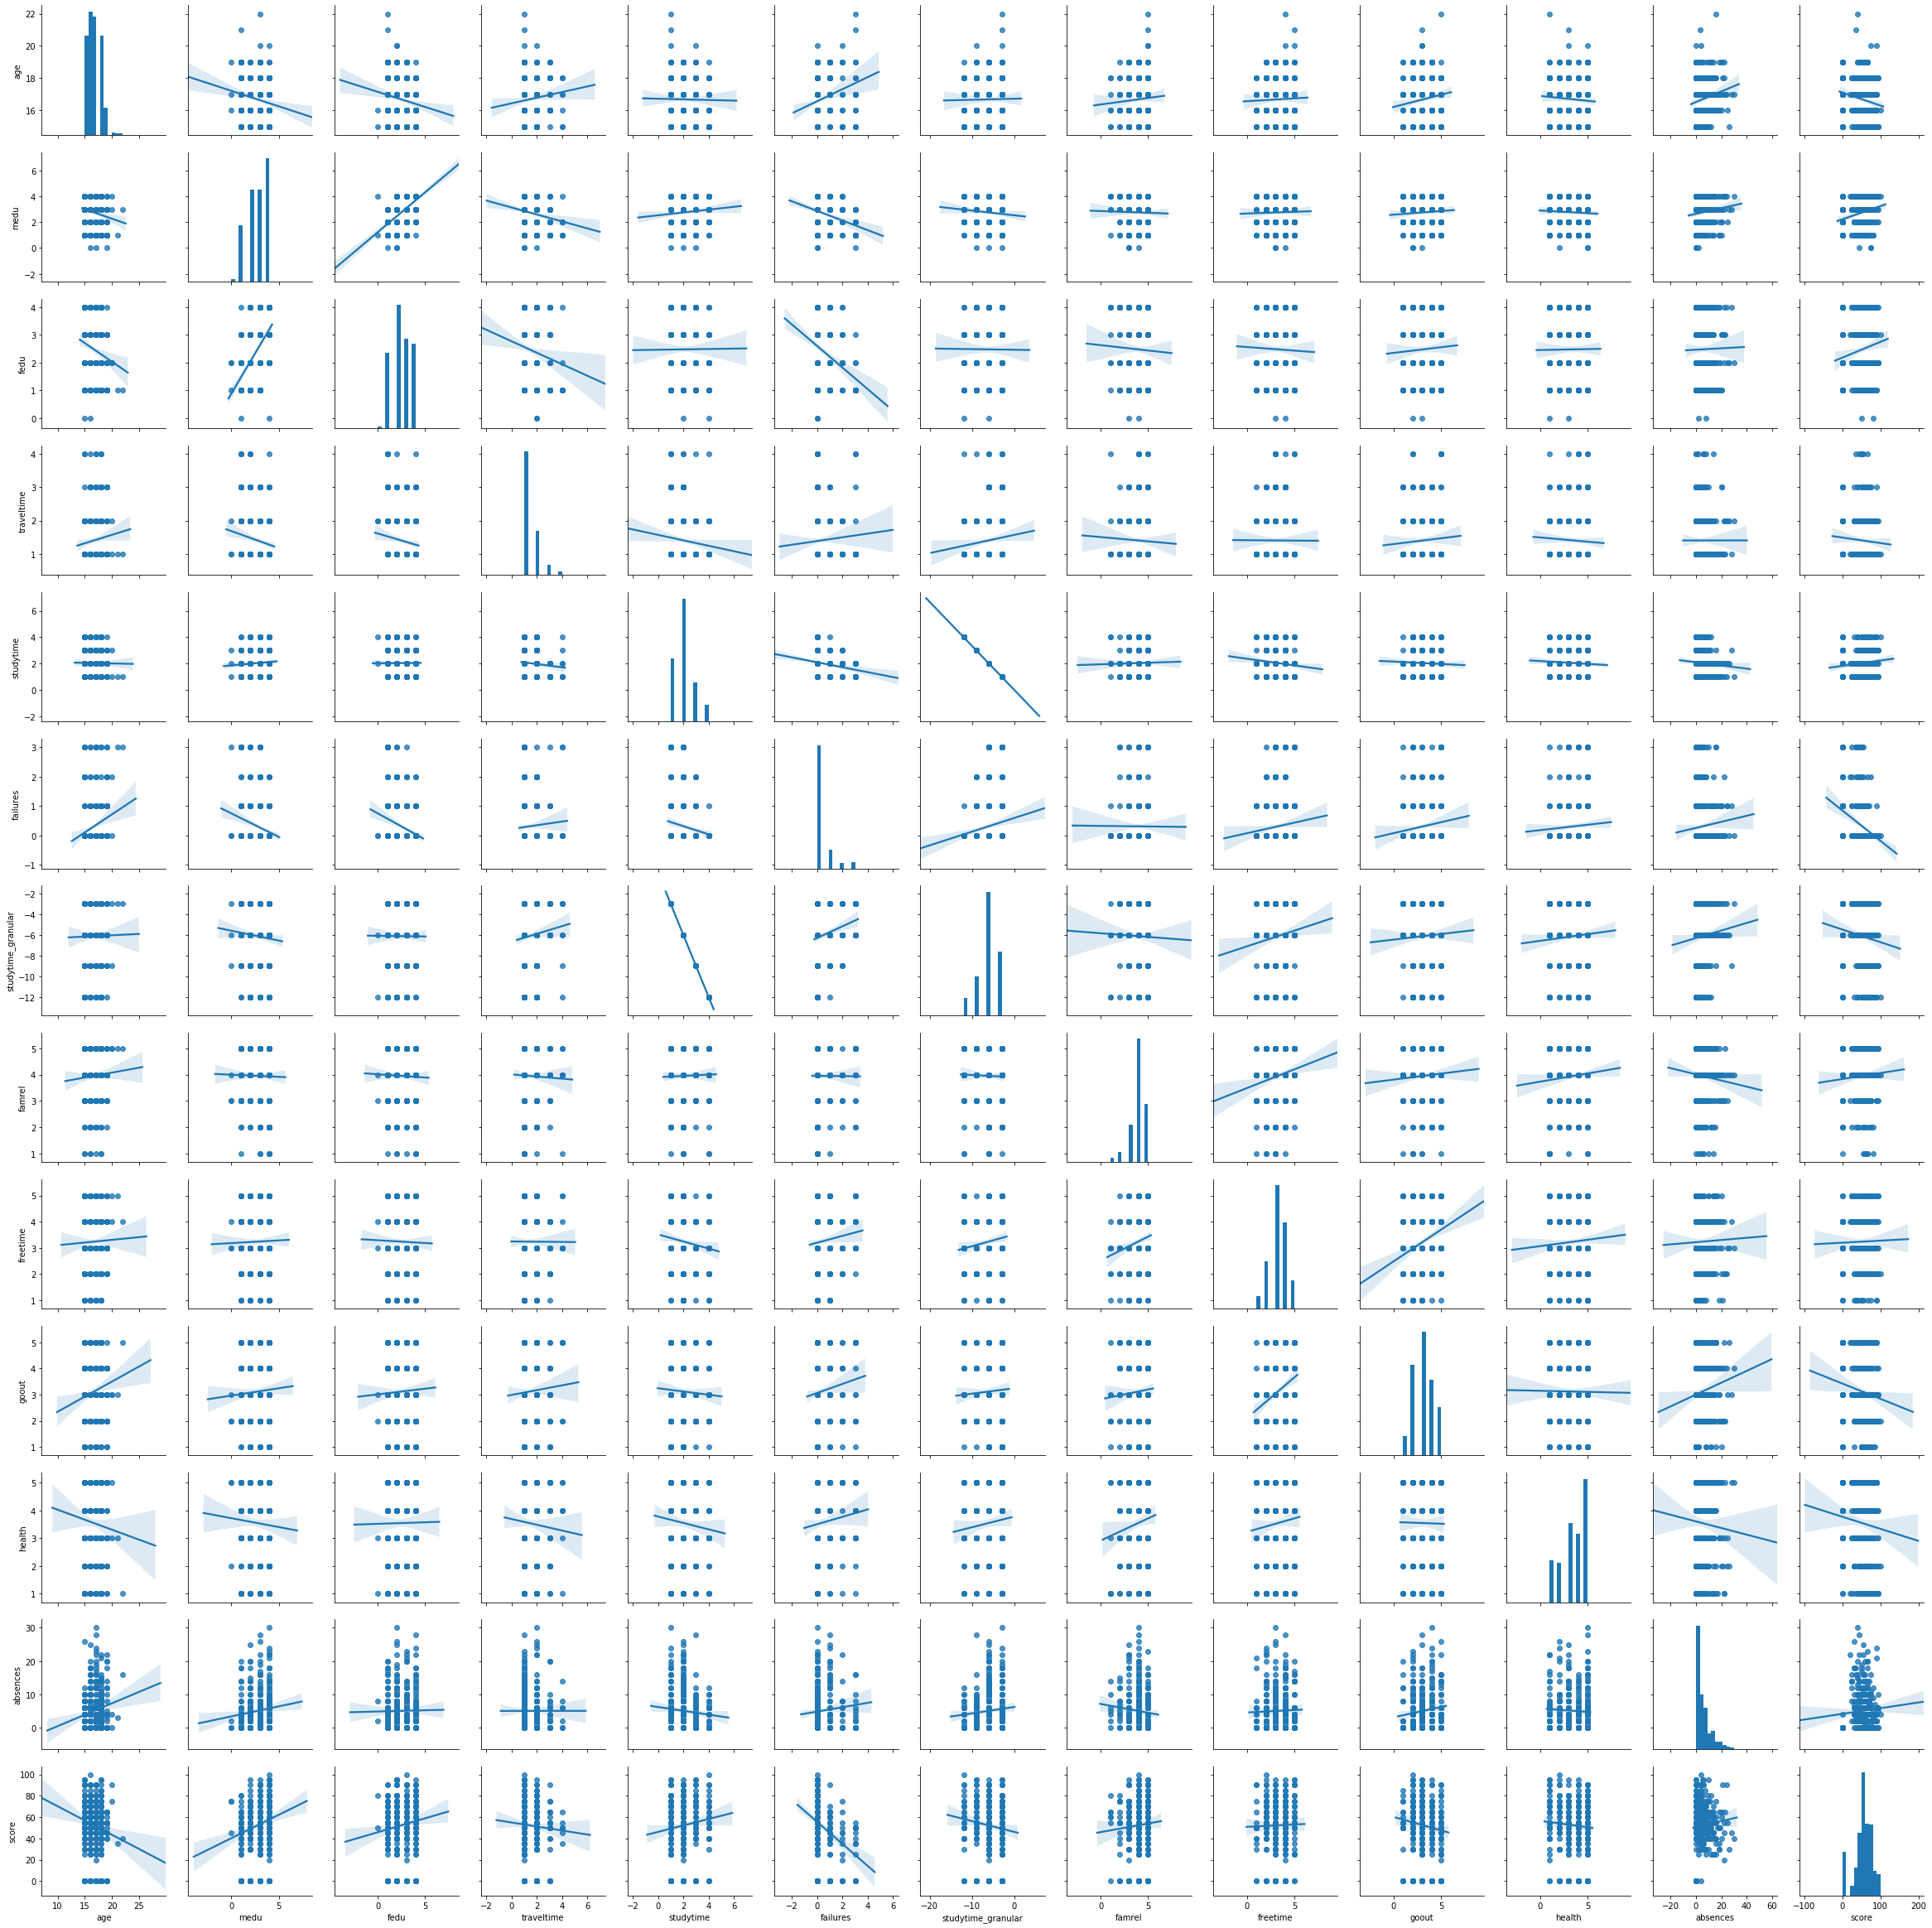

In [44]:

sns.pairplot(math, kind = 'reg')


Text(0.5, 1, 'Correlation Heatmap')

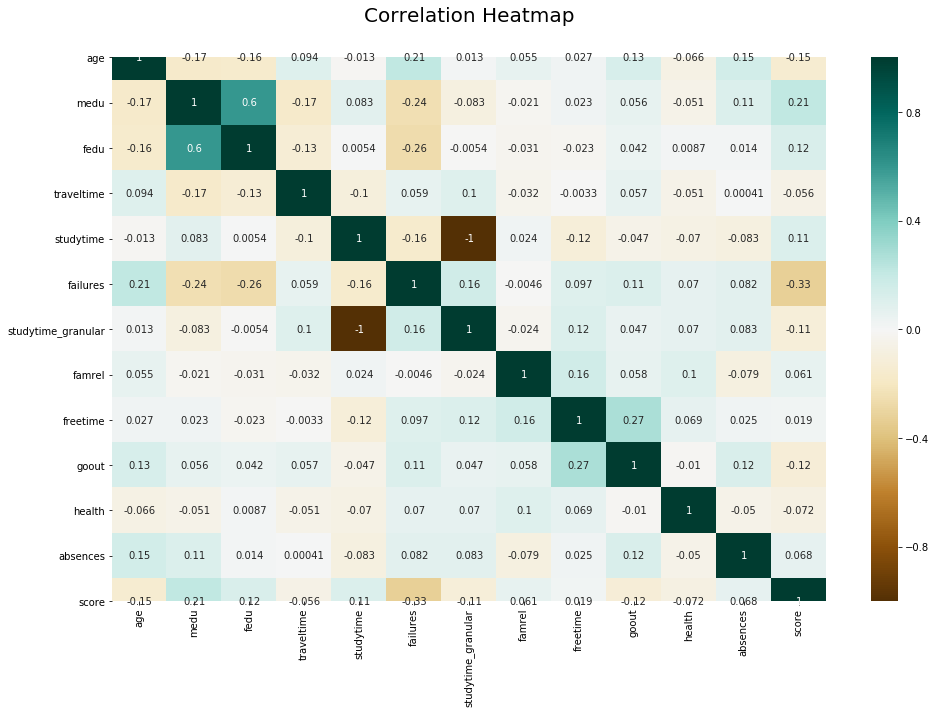

In [45]:
# Correlations heatmap

plt.figure(figsize=(16, 10))
heatmap = sns.heatmap(math.corr(), annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=36)


Based on the Pearson correlations it can be concuded that:
- There are 100% correlated variables "studyteim_granular" and "studytime".
- There is 0.6 correlation between education of mother and father
- There is negativ correlation -0.33 between "score" and "failures" variables
- There are also some correlation at the level of 0.2-0.3: negative correlation between education of mother and father and failures (more educated are parents, less failures registered); positive correlation 0.27 between "freetime" and "goout"; positive corelation 0.21 between failures and age (older are students more there are failures).


##### Binary variables (coded "yes/no") can be taken into account with Spearman correlation

In [46]:

for col in ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    transform_binary(col)
    

,schoolsup
0,337
1,49


,famsup
1,213
0,173


,paid
0,235
1,151


,activities
0,194
1,192


,nursery
1,293
0,93


,higher
1,348
0,38


,internet
1,297
0,89


,romantic
0,266
1,120


In [47]:
math.head(25)

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,None,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,1,0,0,0,1,-6.0,1,0,0,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,None,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,0,1,0,0,0,-6.0,1,1,0,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,1,0,0,0,1,-6.0,1,1,0,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,None,home,mother,1.0,3.0,0.0,0,1,1,1,1,-9.0,1,1,1,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,0,1,1,0,1,-6.0,1,0,0,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,0,1,1,1,1,-6.0,1,1,0,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,None,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,0,0,0,0,1,-6.0,1,1,0,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,1,1,0,0,1,-6.0,1,0,0,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,0,1,1,0,1,-6.0,1,1,0,4.0,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,None,None,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,0,1,1,1,1,-6.0,1,1,0,5.0,5.0,1.0,5.0,0.0,75.0


Text(0.5, 1, 'Correlation Heatmap')

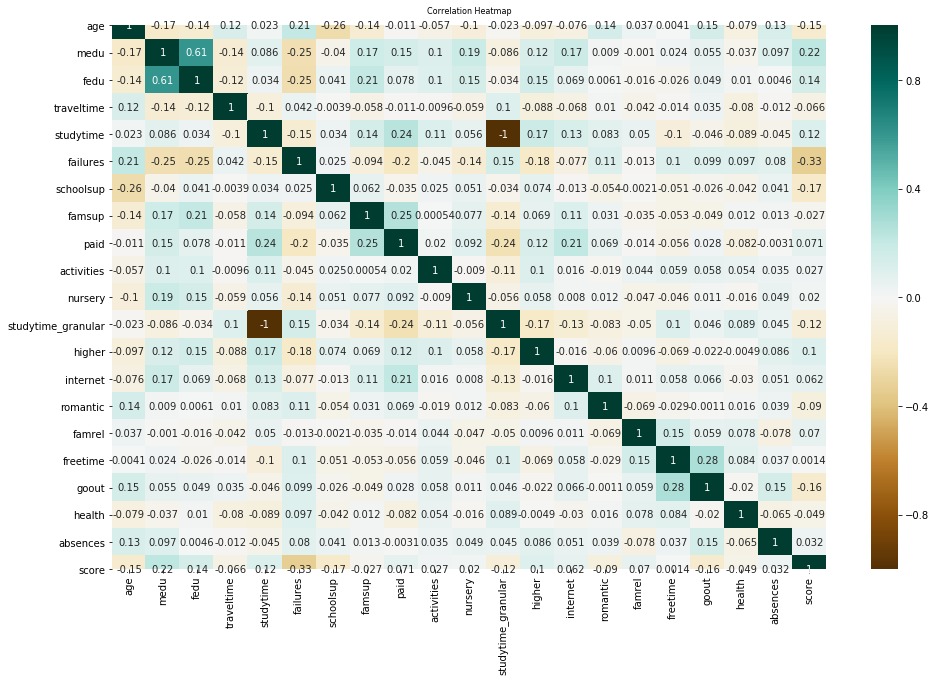

In [48]:
# Spearman correlation

plt.figure(figsize=(16, 10))
heatmap = sns.heatmap(math.corr("spearman"), annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':8}, pad=12)


Several interesting correlations can be noted.

- "Schoolsup" is negatively correlated with age (-0.26), famsup correlated with parents education (medu, 0.2; fedu 0.21) and with "paid", additional paid lessons, (0.31);
- "Paid" is correlated with "studytime (0.23);
- "Nursery" is correlated at 0.19 level with mother education (more mother is educated more child goes to nursery);
- "Higher" is negatively correlated with  "failures" (-0.25);
- "Internet" is correlated with mother education (medu, 0.2);
- "Romantic" doesn't have significant correlations.


In [49]:
# Recode the following dichotomous variables to add them to spearman correlation matrix 
# in order to see if there are some relations.

In [50]:
# School attribute
math.loc[:, "school"] = math.loc[:, "school"].apply(lambda x: None if x == "None" else 1 if x == 'GP' else "MS")
display(pd.DataFrame(math.loc[:, "school"].value_counts()))

# Sex attribute
math.loc[:, "sex"] = math.loc[:, "sex"].apply(lambda x: 1 if x == "F" else 0 if x == 'M' else x)
display(pd.DataFrame(math.loc[:, "sex"].value_counts()))

# Address attribute
math.loc[:, "address"] = math.loc[:, "address"].apply(lambda x: None if x == "None" else 1 if x == 'U' else 0)
display(pd.DataFrame(math.loc[:, "address"].value_counts()))

# Famsize attribute
math.loc[:, "famsize"] = math.loc[:, "famsize"].apply(lambda x: None if x == "None" else 1 if x == 'GT3' else 0)
display(pd.DataFrame(math.loc[:, "famsize"].value_counts()))

# Pstatus attribute
math.loc[:, "pstatus"] = math.loc[:, "pstatus"].apply(lambda x: None if x == "None" else 1 if x == 'A' else 0)
display(pd.DataFrame(math.loc[:, "pstatus"].value_counts()))



,school
1,341
MS,45


,sex
1,201
0,185


,address
1,288
0,98


,famsize
1,254
0,132


,pstatus
0,352
1,34


In [51]:
math.head(25)

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,1,1,18,1,0,1,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,1,0,0,0,1,-6.0,1,0,0,4.0,3.0,4.0,3.0,6.0,30.0
1,1,1,17,1,1,0,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,0,1,0,0,0,-6.0,1,1,0,5.0,3.0,3.0,3.0,4.0,30.0
2,1,1,15,1,0,0,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,1,0,0,0,1,-6.0,1,1,0,4.0,3.0,2.0,3.0,10.0,50.0
3,1,1,15,1,1,0,4.0,2.0,health,None,home,mother,1.0,3.0,0.0,0,1,1,1,1,-9.0,1,1,1,3.0,2.0,2.0,5.0,2.0,75.0
4,1,1,16,1,1,0,3.0,3.0,other,other,home,father,1.0,2.0,0.0,0,1,1,0,1,-6.0,1,0,0,4.0,3.0,2.0,5.0,4.0,50.0
5,1,0,16,1,0,0,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,0,1,1,1,1,-6.0,1,1,0,5.0,4.0,2.0,5.0,10.0,75.0
6,1,0,16,0,0,0,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,0,0,0,0,1,-6.0,1,1,0,4.0,4.0,4.0,3.0,0.0,55.0
7,1,1,17,1,1,1,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,1,1,0,0,1,-6.0,1,0,0,4.0,1.0,4.0,1.0,6.0,30.0
8,1,0,15,1,0,1,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,0,1,1,0,1,-6.0,1,1,0,4.0,2.0,2.0,1.0,0.0,95.0
9,1,0,15,1,0,0,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,0,1,1,1,1,-6.0,1,1,0,5.0,5.0,1.0,5.0,0.0,75.0


Text(0.5, 1, 'Correlation Heatmap')

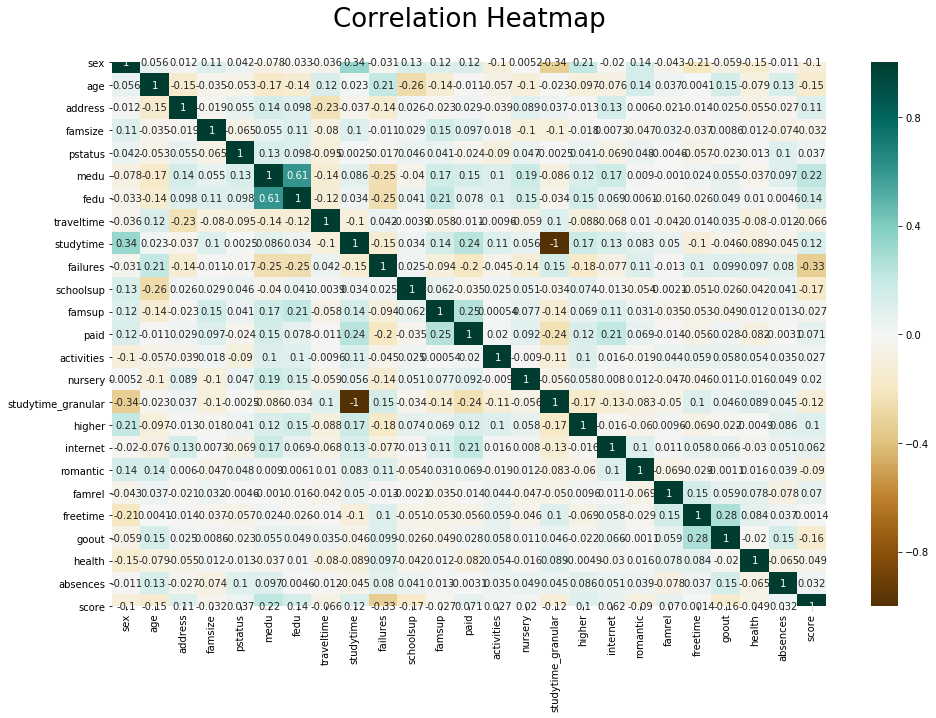

In [52]:
# Spearman correlation

plt.figure(figsize=(16, 10))
heatmap2 = sns.heatmap(math.corr("spearman"), annot=True, cmap='BrBG')
heatmap2.set_title('Correlation Heatmap', fontdict={'fontsize':26}, pad=36)


Again several interesting correlations can be noted.

"School" is negatively correlated with traveltime (-0.26), address (0.3) and age (-0.38), travel time to MS school is higher, GP school studenst are more from urban zone, older students are in MS school
"Sex" is correlated with studytime (0.34) and negatively with freetime (-0.21), girls study more and have less free time
"Address" is correlated with internet (0.22), urban address positively correlated with internett access
"Famsize" family size and "Pstatus"(parents live together or not) are not correlated with any variable.



Although correlations which are found are not strong, the biggest ones correlations with "scores" variable are:
- Failure (-0.33), more failures occurred less the scores is;
- Mother's education (0.22), higheris the education of the mother, better is the score. 
Interesting the fact is that there is not such connection with fathers' education.


In [53]:
# All  variables are to be kept  except "studytime_granular"

math.drop(['studytime_granular'], inplace = True, axis = 1)


## Nominative variables

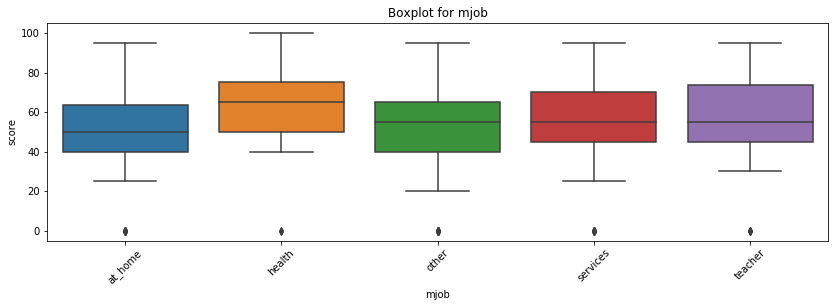

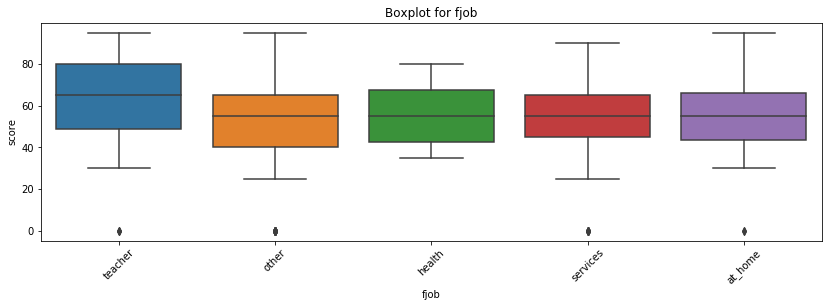

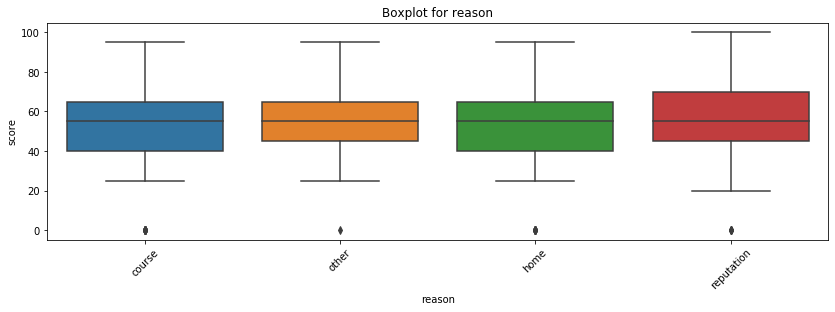

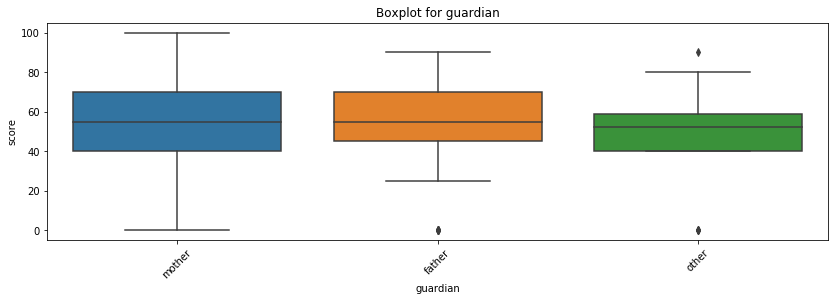

In [54]:
# Plot nominative variables

for col in ['mjob', 'fjob', "reason", "guardian"]:
    get_boxplot(col)

In [55]:
# Look for significant differences between catgories

for col in ['mjob', 'fjob', "reason", "guardian"]:
    get_stat_dif(col)
    

Не найдены статистически значимые различия для колонки mjob
Не найдены статистически значимые различия для колонки fjob
Не найдены статистически значимые различия для колонки reason
Не найдены статистически значимые различия для колонки guardian


In [56]:
# There is not statistical differences within these categorical variables. We can take it out of dataset

math.drop(['mjob', 'fjob', "reason", "guardian"], inplace = True, axis = 1)

In [57]:
math.head()

,school,sex,age,address,famsize,pstatus,medu,fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,1,1,18,1,0,1,4.0,4.0,2.0,2.0,0.0,1,0,0,0,1,1,0,0,4.0,3.0,4.0,3.0,6.0,30.0
1,1,1,17,1,1,0,1.0,1.0,1.0,2.0,0.0,0,1,0,0,0,1,1,0,5.0,3.0,3.0,3.0,4.0,30.0
2,1,1,15,1,0,0,1.0,1.0,1.0,2.0,3.0,1,0,0,0,1,1,1,0,4.0,3.0,2.0,3.0,10.0,50.0
3,1,1,15,1,1,0,4.0,2.0,1.0,3.0,0.0,0,1,1,1,1,1,1,1,3.0,2.0,2.0,5.0,2.0,75.0
4,1,1,16,1,1,0,3.0,3.0,1.0,2.0,0.0,0,1,1,0,1,1,0,0,4.0,3.0,2.0,5.0,4.0,50.0


# Conclusions

Main conslusions:

Finally in dataset 25 variables are kept. 
All variables are numeric so that it can be used for further modelling.
Data are clean, there are no missing values.
